# Supply Chain Analytics for Just-In-Time

In [1]:
import pandas as pd
data = pd.read_csv("data/orders_and_shipments.csv")
data

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,Toys,16799,Pacific Asia,Oceania,Australia,Puerto Rico,2017,12,11,Standard Class,4,12,0.06,6
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,LATAM,South America,Paraguay,Puerto Rico,2015,4,30,Standard Class,4,30,0.12,68
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,Pacific Asia,South Asia,India,Puerto Rico,2016,3,6,Second Class,2,30,0.09,68
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,Europe,Western Europe,Germany,Puerto Rico,2017,7,17,Second Class,2,150,0.02,60


The data is initially explored to get an overview of it's characteristics with the help of the describe method.

In [12]:
data.describe()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Customer ID,Shipment Year,Shipment Month,Shipment Day,Shipment Days - Scheduled,Gross Sales,Profit,Delay
count,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000
mean,35818.833792,89380.257361,201601.137411,2015.948657,6.271679,15.735026,2.149817,6477.672152,2015.955427,6.299569,15.978005,3.072495,200.235690,129.383305,-2.829516
std,20623.809444,51279.388574,79.438616,0.796323,3.373914,8.484049,1.461393,3932.830830,0.798863,3.360191,8.582789,1.184417,114.251482,52.649857,9.610638
min,11.000000,29.000000,201501.000000,2015.000000,1.000000,1.000000,1.000000,2.000000,2015.000000,1.000000,1.000000,1.000000,10.000000,6.000000,-34.000000
25%,17905.000000,44721.500000,201509.000000,2015.000000,3.000000,9.000000,1.000000,3177.000000,2015.000000,3.000000,9.000000,2.000000,120.000000,97.000000,-2.000000
50%,35886.000000,89624.000000,201606.000000,2016.000000,6.000000,16.000000,1.000000,6355.000000,2016.000000,6.000000,16.000000,4.000000,200.000000,125.000000,0.000000
75%,53507.000000,133710.500000,201702.000000,2017.000000,9.000000,23.000000,3.000000,9577.000000,2017.000000,9.000000,23.000000,4.000000,300.000000,150.000000,1.000000
max,77095.000000,180410.000000,201712.000000,2017.000000,12.000000,31.000000,5.000000,20648.000000,2017.000000,12.000000,31.000000,4.000000,533.000000,258.000000,28.000000


**Insight:** The describe method tells us about the count of values, mean and standard deviation within the data, the quartiles and maximum values in each column. This is helpful as it provides perspective into the data. 

In order to ensure the analysis is thorough and complete, it is essential to verify if the dataset has any missing values.

In [17]:
data.count()

Order ID                       30871
 Order Item ID                 30871
 Order YearMonth               30871
 Order Year                    30871
 Order Month                   30871
 Order Day                     30871
Order Time                     30871
Order Quantity                 30871
Product Department             30871
Product Category               30871
Product Name                   30871
 Customer ID                   30871
Customer Market                30871
Customer Region                30871
Customer Country               30871
Warehouse Country              30871
Shipment Year                  30871
Shipment Month                 30871
Shipment Day                   30871
Shipment Mode                  30871
 Shipment Days - Scheduled     30871
 Gross Sales                   30871
 Discount %                    30871
 Profit                        30871
Delay                          30871
dtype: int64

**Insight:** There are no missing values and the data is of integer type, which is perfect for our analysis. 

**Goals of The Analysis:**

Through this analysis, the performance of the supply chain department is analyzed to evaluate the performance and identify opportunities for improvement. This is done by considering the following factors:

1. Delays of orders
2. Customer Order cycle time
3. Inventory Analytics.  



### Calculating the delay dimension
The Delay has been calculated as the Difference between the Shipment Day and Order Day and the difference between the Scheduled Days. 

In [2]:
data['Delay'] = (data['Shipment Day']-data[' Order Day ']) - data[' Shipment Days - Scheduled ']
data.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Delay
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200,2
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200,0
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200,-2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200,-2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200,-2


**Insights on Delays:**

In [3]:
#Identifying the maximum delay of a product
data['Delay'].max()

28

**Insight:** There are products that are getting delayed by 4 weeks, which is not good. 

**More information about products with the most delay**

In [4]:
Select * from data where delay=28

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Delay
0,33306,83196,201605,2016,5,1,04:13,5,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,11603,North America,South of USA,USA,USA,2015,7,30,First Class,1,250,0.17,125,28
1,47501,118746,201612,2016,12,1,17:14,1,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,3545,Africa,North Africa,Morocco,USA,2016,12,31,Second Class,2,100,0.03,245,28
2,6168,15415,201504,2015,4,1,00:34,1,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,2754,LATAM,Central America,Mexico,USA,2017,8,31,Second Class,2,40,0.15,97,28


**Insight(s):** 
1. There are three Products ( O'brien Men's Neoprene Life.., Nike Men's 5.0+.. and Under Armour Girl's Toddler..) from three different Product categories ( Indoor/Outdoor Games, Cardio Equipment and Shop by Sport) from three different customers (IDS: 11603, 3545, 2754) from three different markets( North America: USA, Africa: Morocco and LATAM: Mexico).
2. The one thing in common from all three most delayed products are they are all stored in USA.
3. The Shipment years are 2015,2016 and 2017 where the order in 2015 was shipped in First Class Mode and the orders in 2016 & 2017 were shipped in the Second Class Mode. This exposes a room for improvement in shipping to reduce delays.

**Visualizing Delays by Country, Products, Month and Year**

Firstly, the countries with the most delays are identified:

**Stage 1: Descriptive & Diagnostics-** Important information about the data is visualized and problems are identified, starting with delays.

![Screenshot 2023-08-02 at 3.40.40 PM](Screenshot%202023-08-02%20at%203.40.40%20PM.png)


**Insight:** The UAE has the highest number of delays on average. 

**Stage 2: Prescriptive & Predictive:** Why these problems might be happening and how they can be resolved.

The product categories and product names with the highest delays are plotted:


![Screenshot 2023-08-02 at 3.44.18 PM](Screenshot%202023-08-02%20at%203.44.18%20PM.png)

![Screenshot 2023-08-02 at 3.47.37 PM](Screenshot%202023-08-02%20at%203.47.37%20PM.png)


**Insight:** 
1. The product categories of toys and consumer electronics need to be shipped faster.
2. The products Diamondback Boys' insight 24.., and TaylorMade Women's RBZ SL Rescue need to be shipped faster.

**Profit by Shipment Mode:** This metric has been visualized to identify which shipment mode to prioritize for profitability
![Screenshot 2023-08-02 at 4.00.27 PM](Screenshot%202023-08-02%20at%204.00.27%20PM.png)

**Insight:** The standard class shipment mode is the most profitable category and should be prioritized. 

### **Trend Analysis:** Time Series plots provide some perspective on the trend in delays over the years and months

<AxesSubplot: xlabel=' Order Year ', ylabel='Delay'>

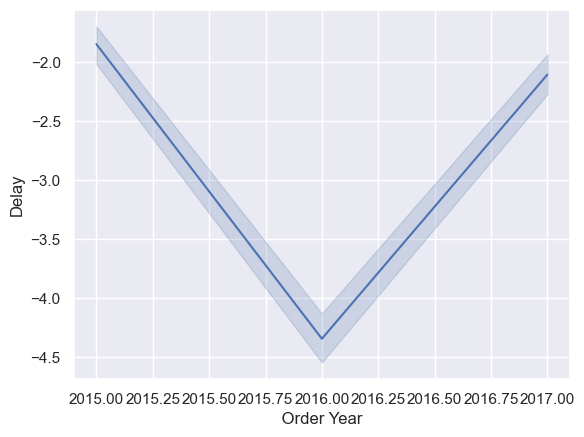

In [5]:
#Delay by year
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x=' Order Year ', y='Delay',
             data=data)

**Insight:** Since 2015, Delays have been dropping but have also been increasing since 2016, possibly explaning the decline in sales. 

<AxesSubplot: xlabel=' Order Month ', ylabel='Delay'>

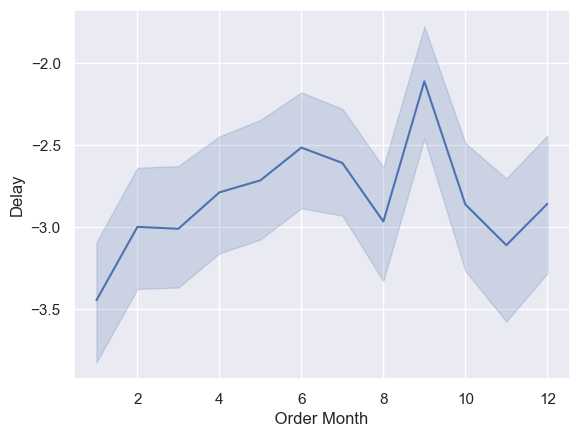

In [6]:
#Delay by month
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x=' Order Month ', y='Delay',
             data=data)

**Insight:** The data tells us that on average, Shipment delays are the highest in the month of September.

The product categories with the highest inventory count (supply) and sales (demand) are visualized to gain perspective on whether the right things are being stored. The inventory turnover count is also visualized to provide perspective on the days of the month that see the most sales, along with the best time in the day for a sale.

![Screenshot 2023-08-02 at 6.56.46 PM](Screenshot%202023-08-02%20at%206.56.46%20PM.png)



![Screenshot 2023-08-02 at 6.58.12 PM](Screenshot%202023-08-02%20at%206.58.12%20PM.png)


![Screenshot 2023-08-02 at 6.59.08 PM](Screenshot%202023-08-02%20at%206.59.08%20PM.png)


![Screenshot 2023-08-02 at 7.21.00 PM](Screenshot%202023-08-02%20at%207.21.00%20PM.png)


**Insights:**
1. The Product category 'Girls Apparel' is the most stored category in inventory.
2. The Product category 'Fishing' has the most sales. Maybe we need to store more products in that category. 
3. The pattern of purchases seems to be increasing in a month till the last week after which is declines sharply. 
4. The most sales are made at 8.27 Am.

## 🧾 Executive summary
Sales have been dropping between 2016 and 2017. This is possibly due to an increase in delays during this period. The delays can be reduced by stocking up on the most selling product categories like Fishing, cleats, camping & hiking, cardio equipment and women's apparel. The products with the most delay are stored in warehouses in the USA where sales are also the highest, which makes sense for business although distributing inventory across regional warehouse centers with would enhance the reach to newer markets and reduce delays (like the UAE).

## 📷 Dashboard screenshots



**Overview:**
![Screenshot 2023-08-03 at 6.21.13 PM](Screenshot%202023-08-03%20at%206.21.13%20PM.png)



**Descriptive:** What's going on?
![Screenshot 2023-08-03 at 6.21.37 PM](Screenshot%202023-08-03%20at%206.21.37%20PM.png)



**Diagnostic:** Where can we improve?
![Screenshot 2023-08-03 at 6.22.04 PM](Screenshot%202023-08-03%20at%206.22.04%20PM.png)



**Dashboard Summary:**

1. The 5 Most Profitable Countries are: USA, France, Mexico, Germany and Brazil respectively. Profits went up between 2015-16 but have declined in 2016-17. The most profitable categories of products are: Cleats, Fishing, Indoor/Outdoor gear, Men's footwear and Women's apparel. 
2. Customer 9897 is our most loyal customer, Dumbells are our most expensive inventory, 1% Discounts had the highest sales, Girl's Apparel is the most stored product in our inventory, Fishing is the top selling product category and the best time for a sale in a day is 8.27 Am. 
3. Toys are the most delayed product, Footwear takes the longest to ship, Product shipments are delayed the most in the UAE, Sales increase steadily for the first three weeks of any month and Standard class shipment modes have the highest order quantities. 

## 🌐 Upload your dashboard
**Link to complete Tableau Dashboard:** https://public.tableau.com/app/profile/ritaban.mitra8426/viz/SupplyChainAnalytics_16910215333160/Story1